# Supervised Machine Learning: Microsoft Malware Prediction :Regression lineal

**Máster en Data Science & AI**  
**Objetivo:** Estimar la probabilidad de infección por malware en máquinas Windows usando propiedades del sistema.  
**Target:** `HasDetections` · **ID único:** `MachineIdentifier`  

> **Aplicación**: Integración en *Windows Defender* para alertar al usuario si su probabilidad de infección supera un umbral de negocio.

In [ ]:
!pip install optuna optuna-integration[lightgbm]

### IMPORTAMOS LIBRERÍAS Y DATOS

Importamos las librerias

In [ ]:
# 0. Imports y configuración

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
# Métricas para modelo de clasificación

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
#Import AUC-ROC
from sklearn.metrics import roc_auc_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ML Canvas

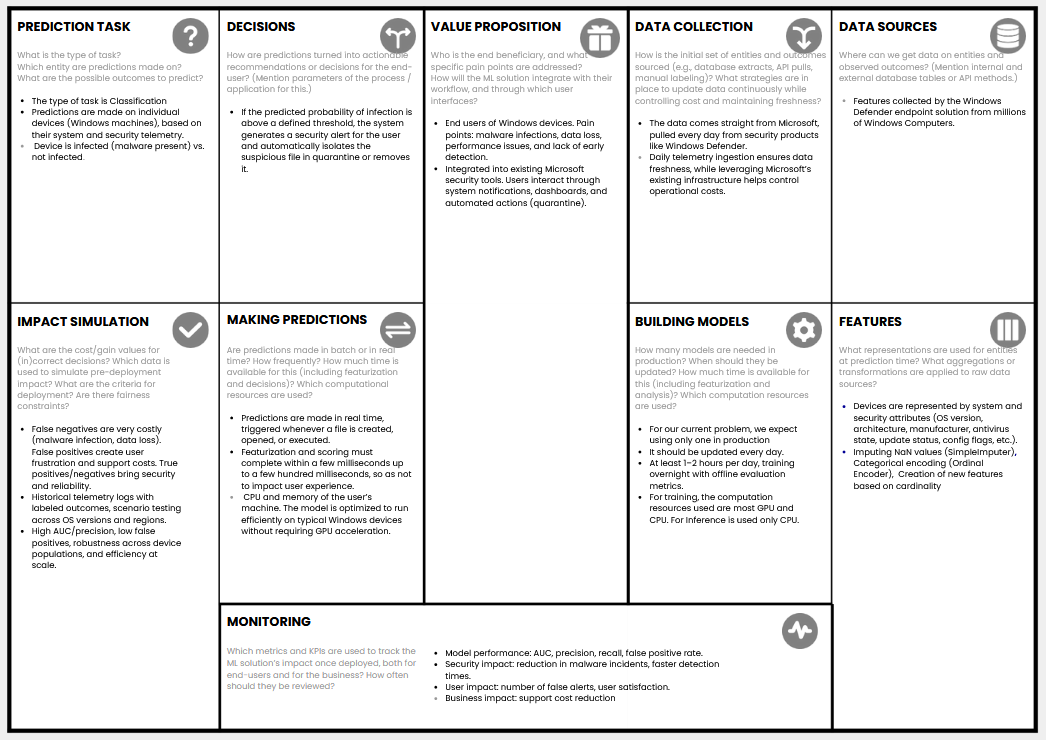

leemos el fichero

In [ ]:
# Configuración de rutas
LOCAL_PATH = "/content/sample_mmp.csv"
df = pd.read_csv(LOCAL_PATH)
df.head()

/tmp/ipython-input-378947647.py:3: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(LOCAL_PATH)


,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


### VISTA INICIAL DEL DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [ ]:
df.columns

Index(['Unnamed: 0', 'MachineIdentifier', 'ProductName', 'EngineVersion',
       'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeN

In [ ]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier

In [ ]:
#Cantidad de filas y columnas
df.shape

(500000, 84)

In [ ]:
#Estadisticas descriptiva basicas
df.describe()

,Unnamed: 0,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,5.000000e+05,500000.000000,498168.000000,500000.000000,24061.000000,498062.000000,498062.000000,498062.000000,500000.000000,500000.000000,...,490939.000000,500000.000000,182334.0,499099.000000,500000.000000,500000.000000,495960.000000,483050.000000,483050.000000,500000.000000
mean,4.458888e+06,0.000002,6.846207,0.017242,1652.824529,47850.908413,1.326763,1.020714,0.987816,108.037454,...,33030.988944,0.485438,0.0,0.007067,0.125434,0.037744,0.057245,0.284060,7.888577,0.499906
std,2.575619e+06,0.001414,1.023049,0.130172,1004.754276,14023.085346,0.523000,0.166608,0.109707,63.068540,...,21220.161428,0.499788,0.0,0.083766,0.331211,0.190577,0.232310,0.450966,4.551764,0.500000
min,2.000000e+00,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.227692e+06,0.000000,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,...,13156.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,4.461368e+06,0.000000,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
75%,6.690936e+06,0.000000,7.000000,0.000000,2381.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,...,52436.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,8.921471e+06,1.000000,35.000000,1.000000,3209.000000,70492.000000,5.000000,4.000000,1.000000,222.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
#Esta configuracion permite mostrar todas las 86 creo, columnas
pd.set_option('display.max_rows', None)

In [ ]:
# Valores unicos
df.nunique().sort_values(ascending=False)

,0
Unnamed: 0,500000
MachineIdentifier,500000
Census_SystemVolumeTotalCapacity,142051
Census_OEMModelIdentifier,40697
CityIdentifier,37157
Census_FirmwareVersionIdentifier,23569
AvSigVersion,6455
AVProductStatesIdentifier,5516
Census_InternalBatteryNumberOfCharges,5248
Census_ProcessorModelIdentifier,2243


Inicialmente, tenemos dos variables con 100% de cardinnalidad `Unnamed: 0`, `MachineIdentifier`. En un total de 500k registros, ambas presentan 500k registros unicos. Eso no aportaria mucho al modelo, asi que es opcion eliminarlas. Tambien eliminamos las columnas con solo 1 unica valor

In [ ]:
Lista_nunique_alto=[]
Lista_nunique_uni= []
for i in df.columns:
  if df[i].nunique()>= 400000:
    Lista_nunique_alto.append(i)
  elif df[i].nunique()== 1:
    Lista_nunique_uni.append(i)

print(Lista_nunique_alto,Lista_nunique_uni)

['Unnamed: 0', 'MachineIdentifier'] ['PuaMode', 'Census_IsWIMBootEnabled']


In [ ]:
df.drop(Lista_nunique_alto, axis= 1, inplace = True)

In [ ]:
df.drop(Lista_nunique_uni, axis= 1, inplace = True)

In [ ]:
print(f"Quedamos con {df.shape[0]} filas y {df.shape[1]} Columnas")

Quedamos con 500000 filas y 80 Columnas


eliminamos tambien las columnas donde el Top N-unique es superior a 95%

In [ ]:
cols_top95 = []

for col in df.columns:
    top_value_percent = df[col].value_counts(normalize=True, dropna=False).iloc[0] * 100

    if top_value_percent > 95:
        cols_top95.append({
            'Column_Name': col,
            'Top_Value_%': top_value_percent
        })

df_top95 = pd.DataFrame(cols_top95).sort_values(by='Top_Value_%', ascending=False).reset_index(drop=True)

print(df_top95)


                         Column_Name  Top_Value_%
0                             IsBeta      99.9998
1                    AutoSampleOptIn      99.9972
2   Census_IsPortableOperatingSystem      99.9478
3                Census_DeviceFamily      99.8366
4              Census_ProcessorClass      99.5836
5                       UacLuaenable      99.2552
6             Census_IsVirtualDevice      99.1144
7                        ProductName      98.9208
8                             HasTpm      98.7816
9                   IsSxsPassiveMode      98.2758
10          Census_IsFlightsDisabled      98.2120
11                 AVProductsEnabled      97.0358
12                  RtpStateBitfield      96.9682
13                          Firewall      96.8142
14                             OsVer      96.7660
15                          Platform      96.6096
16               Census_IsPenCapable      96.2256
17         DefaultBrowsersIdentifier      95.1878


In [ ]:
,cols_to_drop = [col['Column_Name'] for col in cols_top95]
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.shape

(500000, 62)

Analisamos inicialmente nuestra variable target

In [ ]:
target= df['HasDetections']

In [ ]:
# 2.2 Target
print('Distribuicion del Target (%): ')
display(df['HasDetections'].value_counts(dropna=False, normalize=True)*100)
print('Target Balanceado :) ')
print(' ')

Distribuicion del Target (%): 


,proportion
HasDetections,
0,50.0094
1,49.9906


Target Balanceado :) 
 


### DUPLICADOS

In [ ]:
# Checamos los duplicados
print(f" El dataset tiene {df.duplicated().sum()} duplicados.")

 El dataset tiene 37 duplicados.


In [ ]:
# Visualizamos los valores duplicados
df[df.duplicated(keep=False)]

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
4337,1.1.15200.1,4.18.1807.18075,1.275.11.0,53447.0,1.0,120,120697.0,11.0,144.0,75,...,Retail,NaN,628.0,57723.0,1,0,0.0,0.0,3.0,0
15396,1.1.15100.1,4.18.1807.18075,1.273.1494.0,53447.0,1.0,41,130775.0,18.0,52.0,217,...,Retail,NaN,628.0,44624.0,1,0,0.0,0.0,10.0,1
15841,1.1.15200.1,4.18.1807.18075,1.275.1198.0,53447.0,1.0,160,35251.0,48.0,204.0,170,...,Retail,NaN,486.0,51023.0,1,0,0.0,1.0,3.0,1
17354,1.1.13504.0,4.11.15063.0,1.237.0.0,53447.0,1.0,57,56452.0,NaN,76.0,222,...,Retail,NaN,142.0,9599.0,0,0,0.0,1.0,10.0,0
21260,1.1.15200.1,4.18.1807.18075,1.275.850.0,53447.0,1.0,97,97229.0,NaN,126.0,124,...,Retail,NaN,444.0,13790.0,0,0,0.0,0.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451194,1.1.13504.0,4.11.15063.0,1.237.0.0,62773.0,1.0,62,60233.0,18.0,88.0,80,...,Retail,NaN,628.0,12995.0,1,1,0.0,0.0,15.0,0
465187,1.1.13504.0,4.11.15063.0,1.237.0.0,53447.0,1.0,169,20691.0,18.0,209.0,179,...,Retail,NaN,142.0,12463.0,0,0,0.0,0.0,3.0,1
467635,1.1.15200.1,4.12.17007.18022,1.275.11.0,53447.0,1.0,107,NaN,27.0,138.0,134,...,Retail,NaN,142.0,8687.0,0,0,0.0,0.0,1.0,0
475059,1.1.14700.5,4.14.17613.18039,1.265.717.0,53447.0,1.0,81,56441.0,18.0,107.0,224,...,Retail,NaN,500.0,40951.0,0,0,0.0,1.0,10.0,1


In [ ]:
#Para no agregar ruido a nuestro modelo, borraremos los valores duplicados
df.drop_duplicates(inplace=True)

In [ ]:
#Checamos potra vez, nomas para asegurarnos
df.duplicated().sum()

np.int64(0)

### ANALISIS DE NULOS

In [ ]:
print(f" El dataset tiene {df.isna().sum().sum()} valores nulos.")

 El dataset tiene 1592140 valores nulos.


In [ ]:
df.isnull().sum()

,0
EngineVersion,0
AppVersion,0
AvSigVersion,0
AVProductStatesIdentifier,1938
AVProductsInstalled,1938
...,...
Census_IsTouchEnabled,0
Census_IsAlwaysOnAlwaysConnectedCapable,4039
Wdft_IsGamer,16947
Wdft_RegionIdentifier,16947


Podenmos hacer un heatmap de los valores faltantes

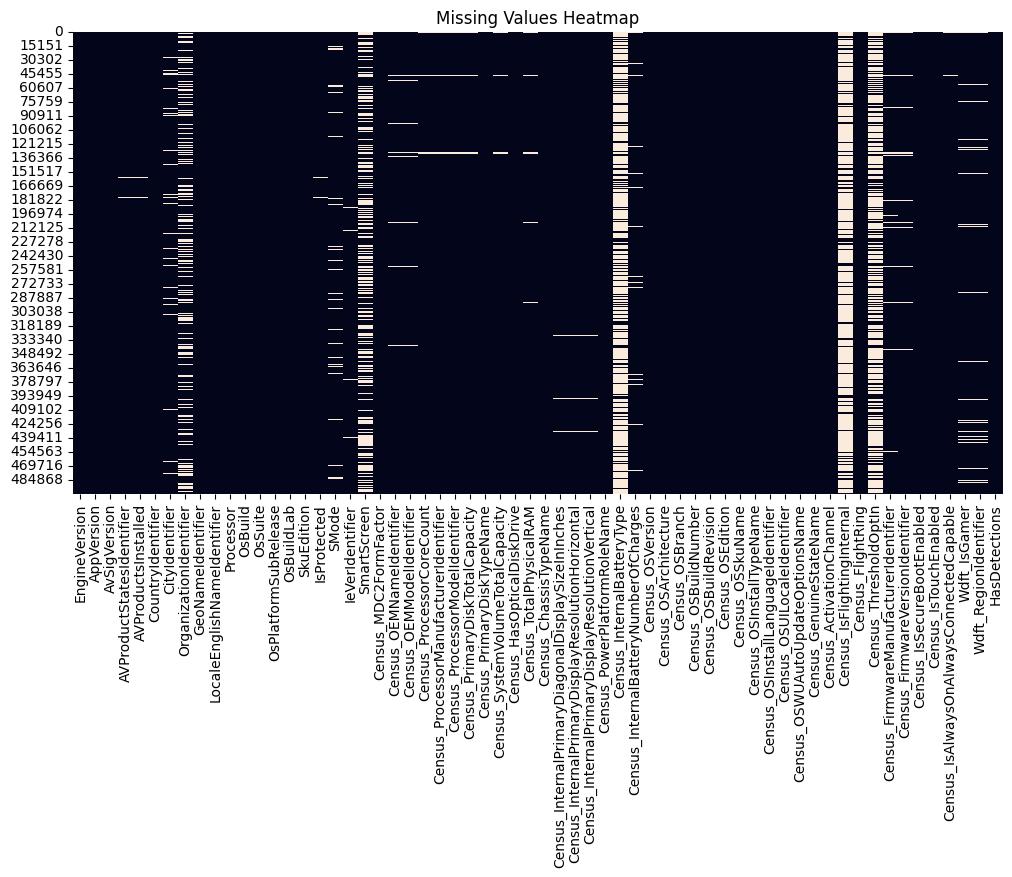

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
#plt.savefig("reports/figs/missing_heatmap.png")
plt.show()

In [ ]:
# Checamos el % de nuloes en cada variable de nuestro dataset
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("\nMissing values (%):\n", missing_percent)


Missing values (%):
 Census_IsFlightingInternal     83.043745
Census_InternalBatteryType     71.118463
Census_ThresholdOptIn          63.618308
SmartScreen                    35.715843
OrganizationIdentifier         30.911687
                                 ...    
Census_GenuineStateName         0.000000
Census_OSUILocaleIdentifier     0.000000
Census_IsSecureBootEnabled      0.000000
Census_IsTouchEnabled           0.000000
HasDetections                   0.000000
Length: 62, dtype: float64


Tenemos variables con valores extremamente alto de nulos (> 70% ). Estas variables no aportarian mucho en nuestro modelo, y inputarlas con (mediana, moda, etc) estariamos agregando ruido a nuestro modelo. Por lo tanto los vamos a eliminar

In [ ]:
high_missing_cols = missing_percent[missing_percent > 70].index.tolist()
df.drop(high_missing_cols, axis=1, inplace=True)
print("Dropped high-missing columns:", high_missing_cols)

Dropped high-missing columns: ['Census_IsFlightingInternal', 'Census_InternalBatteryType']


In [ ]:
print(f"Quedamos con {df.shape[0]} filas y {df.shape[1]} Columnas")

Quedamos con 499963 filas y 60 Columnas


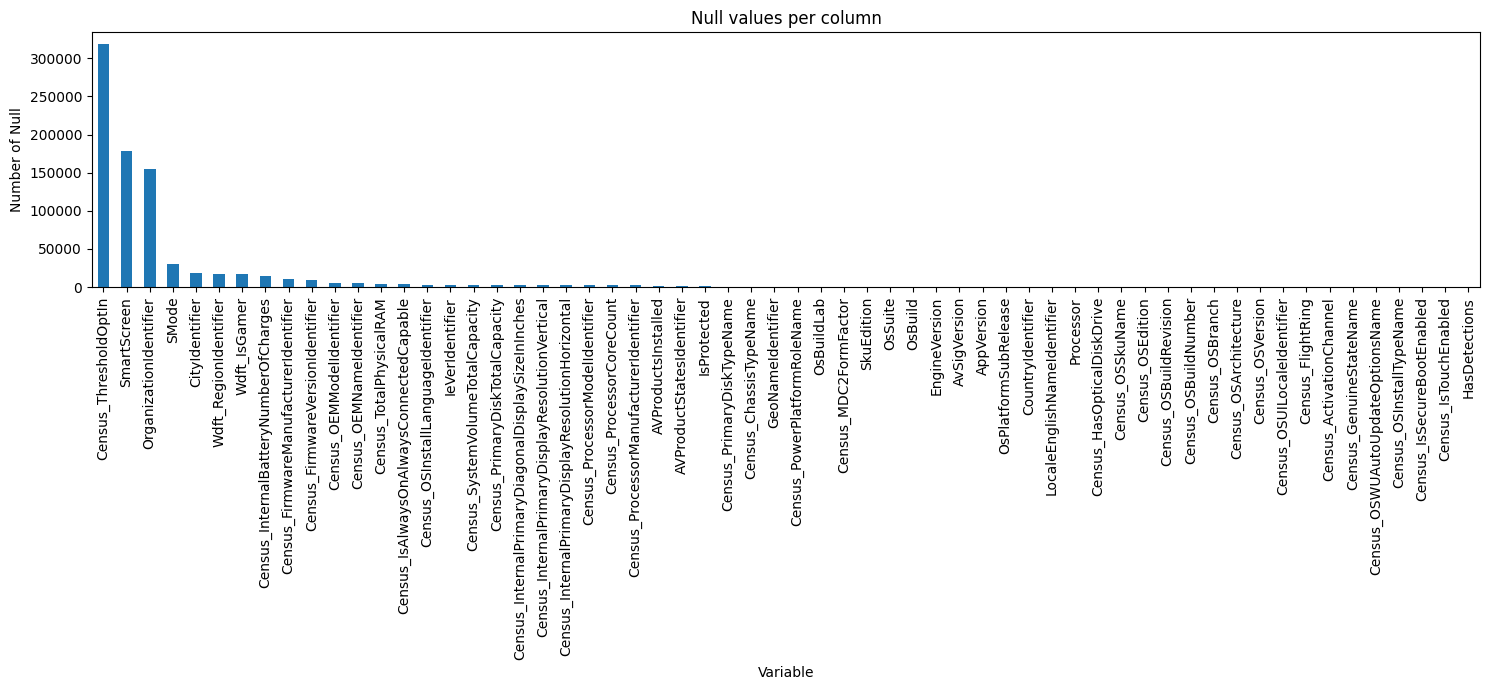

In [ ]:
#Visualizamos la Cantidad de nulos que tenemos ahora
null_counts = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
null_counts.plot(kind='bar')
plt.title("Null values per column")
plt.xlabel("Variable")
plt.ylabel("Number of Null")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Percentage of Missing Values per Column')

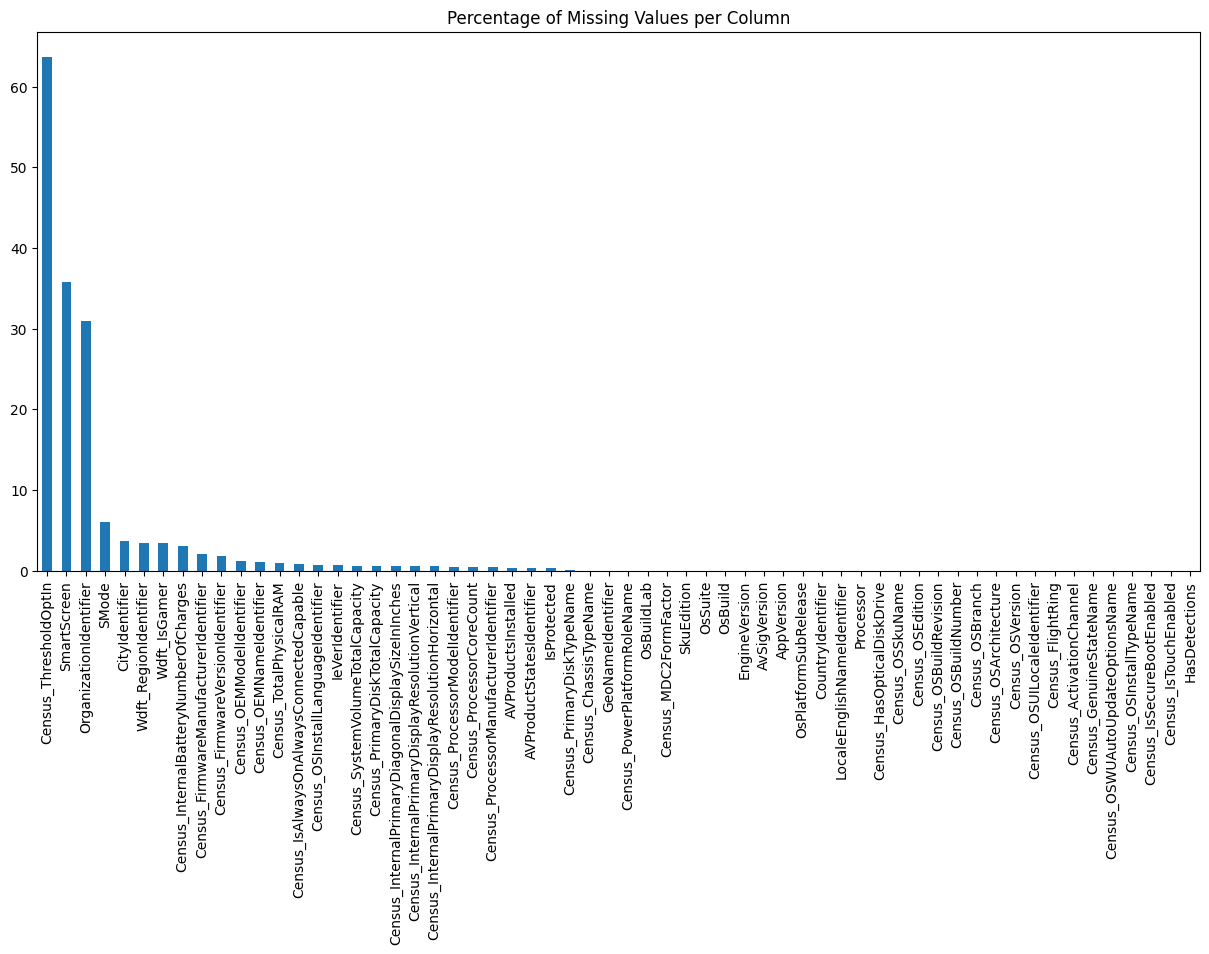

In [ ]:
#Visualizamos el % de nulos que tenemos ahora
plt.figure(figsize=(15, 7))
null_percent = (df.isna().sum() / len(df)) * 100
null_percent.sort_values(ascending=False).plot(kind='bar')
plt.title("Percentage of Missing Values per Column")

Tratamiento de los nulos.

Cuanto al tratamiento de las variables nulos ocuparemos las siguientes metodologias:

**Variables num'ericas o continuas**: Inputaremos los valores nulos, ocupando la mediana de estas variables.

**variables categoricas o discretas** : Ocuparemos la moda

In [ ]:
# Fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")

Missing values handled.


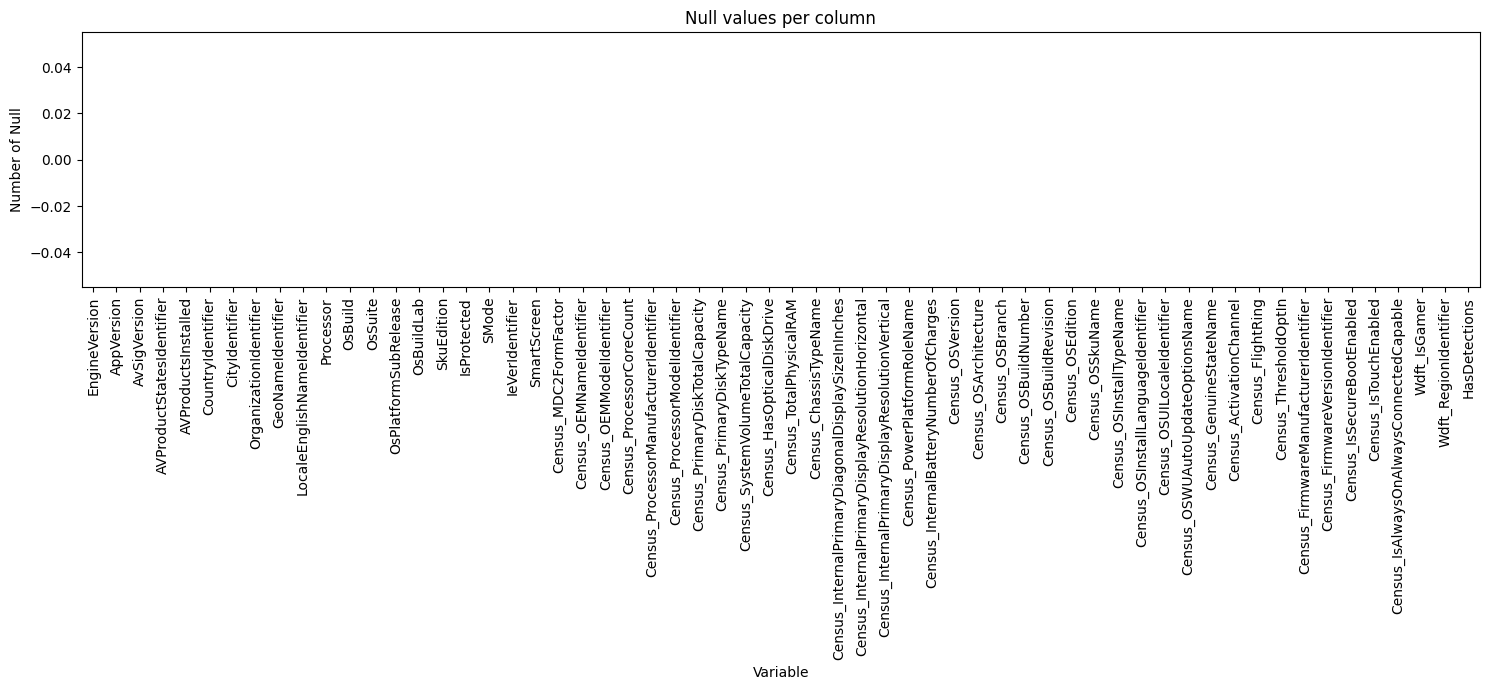

In [ ]:
#Visualizamos la Cantidad de nulos, para asegurarse que imputamos todos los valores nulos
null_counts = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
null_counts.plot(kind='bar')
plt.title("Null values per column")
plt.xlabel("Variable")
plt.ylabel("Number of Null")
plt.tight_layout()
plt.show()

####Analisis de tipos de variables

Vamos a estudiar y separar las variables en funcion de su naturaleza

In [ ]:
# Copiamos el dataframe para no sobreescribir nada en el original.
df2 = df.copy()
df2.head()

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1807.18075,1.273.1234.0,53447.0,1.0,8,85219.0,27.0,205.0,172,...,Retail,0.0,355.0,19951.0,0,0,0.0,0.0,11.0,1
1,1.1.15100.1,4.18.1807.18075,1.273.1282.0,53447.0,1.0,129,54198.0,27.0,126.0,124,...,Retail,0.0,486.0,48753.0,0,0,0.0,1.0,3.0,0
2,1.1.15100.1,4.9.10586.1106,1.273.781.0,46781.0,2.0,149,122689.0,27.0,181.0,56,...,Retail,0.0,554.0,33111.0,1,1,0.0,0.0,15.0,0
3,1.1.15200.1,4.18.1807.18075,1.275.1639.0,53447.0,1.0,164,114587.0,27.0,205.0,172,...,Retail,0.0,142.0,48473.0,1,0,0.0,0.0,15.0,1
4,1.1.15200.1,4.18.1807.18075,1.275.511.0,47238.0,2.0,207,72421.0,27.0,277.0,75,...,Retail,0.0,355.0,4343.0,1,1,0.0,1.0,13.0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499963 entries, 0 to 499999
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      499963 non-null  object 
 1   AppVersion                                         499963 non-null  object 
 2   AvSigVersion                                       499963 non-null  object 
 3   AVProductStatesIdentifier                          499963 non-null  float64
 4   AVProductsInstalled                                499963 non-null  float64
 5   CountryIdentifier                                  499963 non-null  int64  
 6   CityIdentifier                                     499963 non-null  float64
 7   OrganizationIdentifier                             499963 non-null  float64
 8   GeoNameIdentifier                                  499963 non-null  float64
 9 

In [ ]:
df2.isnull().value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Processor,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,499963


Vamos a crear una función que identifique el tipo de cada variable del dataset de entrada.

In [ ]:
target = ["HasDetections"] # Definimos el target

In [ ]:
lista_numericas=[]
lista_boolean=[]
lista_categoricas=[]

for col in df2.columns:
    if col != 'HasDetections':
        if df2[col].dtype in ['int64', 'float64']:
            lista_numericas.append(col)
        elif df2[col].dtype == 'object':
            lista_categoricas.append(col)
        elif df2[col].dtype == 'bool':
            lista_boolean.append(col)

# Remove 'Census_OSBuildNumber' from lista_numericas as it was dropped
if 'Census_OSBuildNumber' in lista_numericas:
    lista_numericas.remove('Census_OSBuildNumber')

print("Numerical columns:", lista_numericas)
print("Categorical columns:", lista_categoricas)
print("Boolean columns:", lista_boolean)

Numerical columns: ['AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'SMode', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Cens

In [ ]:
print("Las variables numéricas son:",lista_numericas)

Las variables numéricas son: ['AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'SMode', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabl

In [ ]:
print("Las variables booleanas son:",lista_boolean)

Las variables booleanas son: []


In [ ]:
print("Las variables categóricas son:",lista_categoricas)

Las variables categóricas son: ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Processor', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


In [ ]:
print("Las variables target es:",target[0])

Las variables target es: HasDetections


In [ ]:
print(len(df2.columns), "variables en total")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

60 variables en total
1 variable a predecir
22 variables categóricas
0 variables boolean
36 variables numéricas


### VARIABLES NUMERICAS

Variables Numericas

[[<Axes: title={'center': 'AVProductStatesIdentifier'}>]]
[[<Axes: title={'center': 'AVProductsInstalled'}>]]
[[<Axes: title={'center': 'CountryIdentifier'}>]]
[[<Axes: title={'center': 'CityIdentifier'}>]]
[[<Axes: title={'center': 'OrganizationIdentifier'}>]]
[[<Axes: title={'center': 'GeoNameIdentifier'}>]]
[[<Axes: title={'center': 'LocaleEnglishNameIdentifier'}>]]
[[<Axes: title={'center': 'OsBuild'}>]]
[[<Axes: title={'center': 'OsSuite'}>]]
[[<Axes: title={'center': 'IsProtected'}>]]
[[<Axes: title={'center': 'SMode'}>]]
[[<Axes: title={'center': 'IeVerIdentifier'}>]]
[[<Axes: title={'center': 'Census_OEMNameIdentifier'}>]]
[[<Axes: title={'center': 'Census_OEMModelIdentifier'}>]]
[[<Axes: title={'center': 'Census_ProcessorCoreCount'}>]]
[[<Axes: title={'center': 'Census_ProcessorManufacturerIdentifier'}>]]
[[<Axes: title={'center': 'Census_ProcessorModelIdentifier'}>]]
[[<Axes: title={'center': 'Census_PrimaryDiskTotalCapacity'}>]]
[[<Axes: title={'center': 'Census_SystemVolume

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


[[<Axes: title={'center': 'Census_InternalPrimaryDiagonalDisplaySizeInInches'}>]]
[[<Axes: title={'center': 'Census_InternalPrimaryDisplayResolutionHorizontal'}>]]
[[<Axes: title={'center': 'Census_InternalPrimaryDisplayResolutionVertical'}>]]
[[<Axes: title={'center': 'Census_InternalBatteryNumberOfCharges'}>]]
[[<Axes: title={'center': 'Census_OSBuildRevision'}>]]
[[<Axes: title={'center': 'Census_OSInstallLanguageIdentifier'}>]]
[[<Axes: title={'center': 'Census_OSUILocaleIdentifier'}>]]
[[<Axes: title={'center': 'Census_ThresholdOptIn'}>]]
[[<Axes: title={'center': 'Census_FirmwareManufacturerIdentifier'}>]]
[[<Axes: title={'center': 'Census_FirmwareVersionIdentifier'}>]]
[[<Axes: title={'center': 'Census_IsSecureBootEnabled'}>]]
[[<Axes: title={'center': 'Census_IsTouchEnabled'}>]]
[[<Axes: title={'center': 'Census_IsAlwaysOnAlwaysConnectedCapable'}>]]
[[<Axes: title={'center': 'Wdft_IsGamer'}>]]
[[<Axes: title={'center': 'Wdft_RegionIdentifier'}>]]


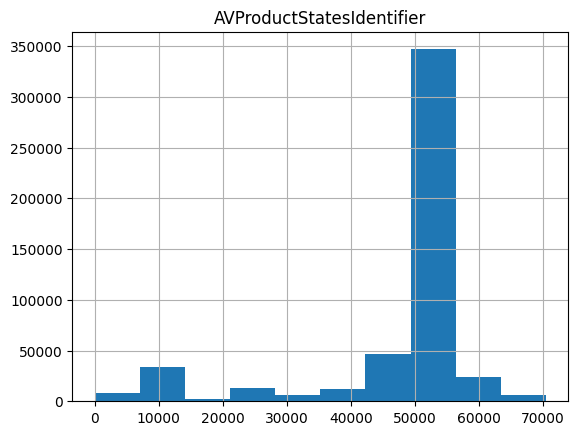

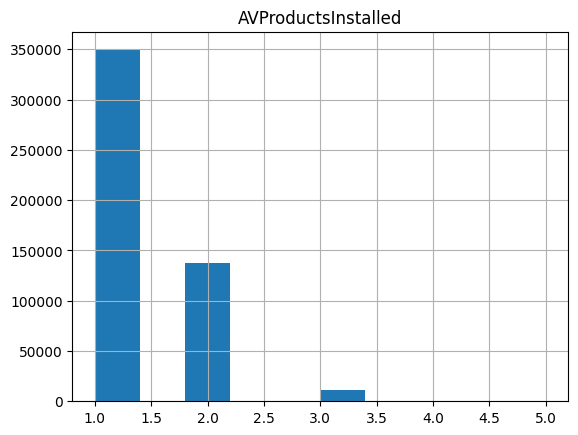

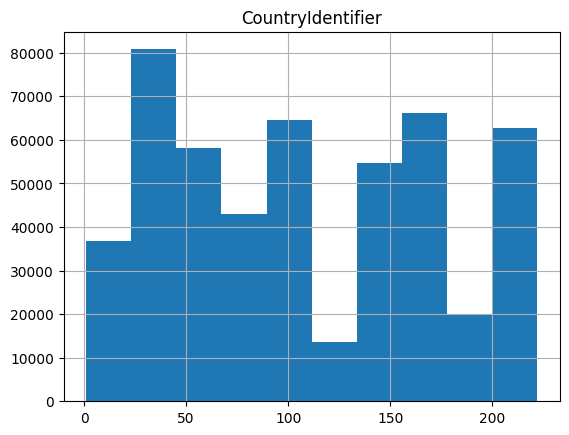

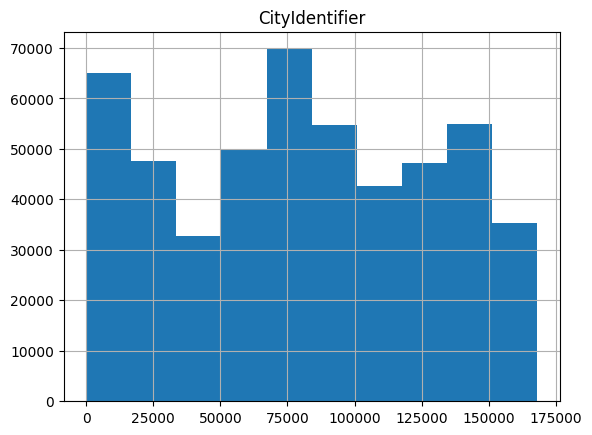

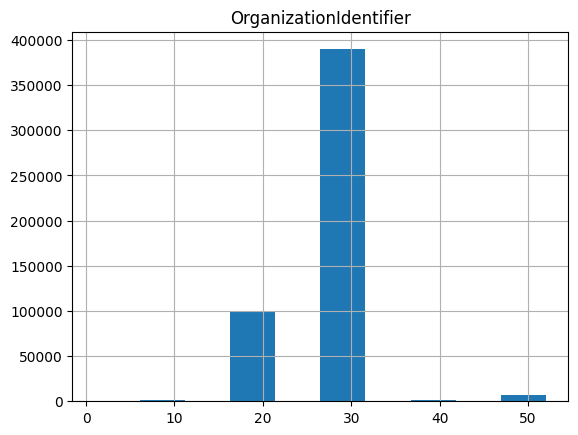

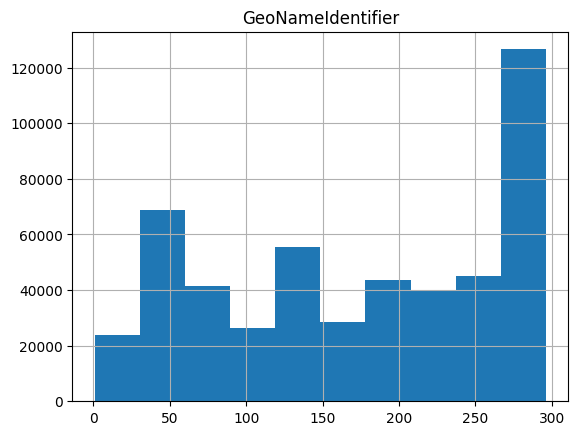

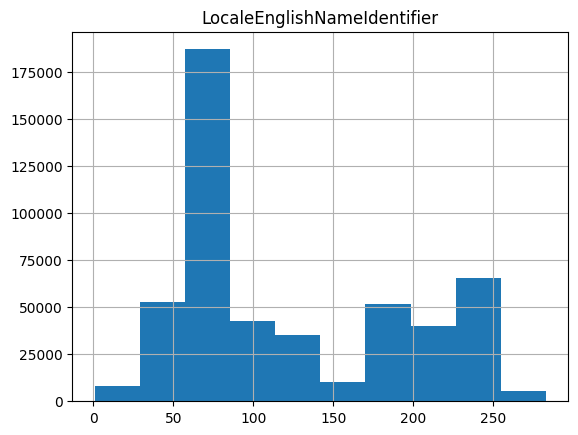

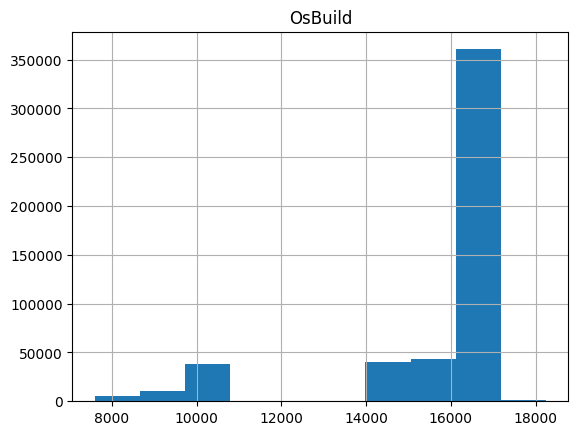

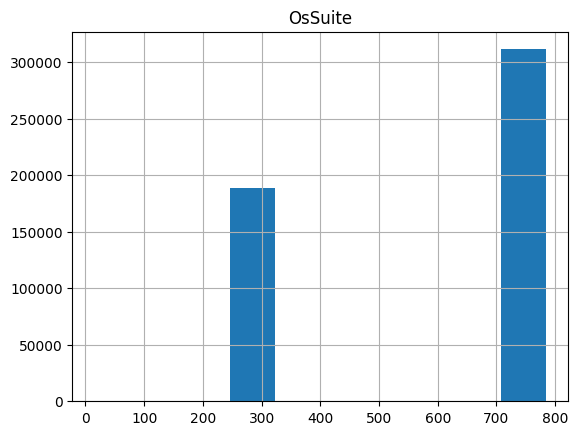

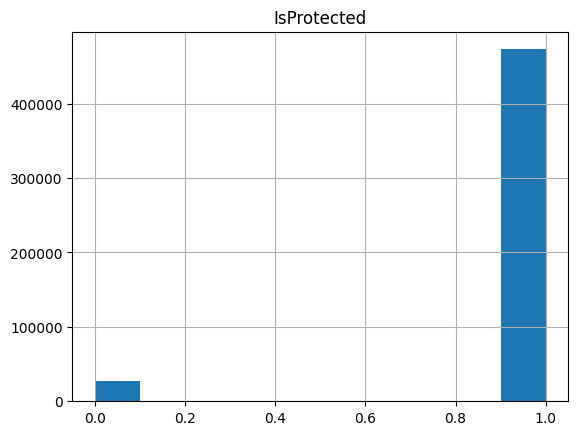

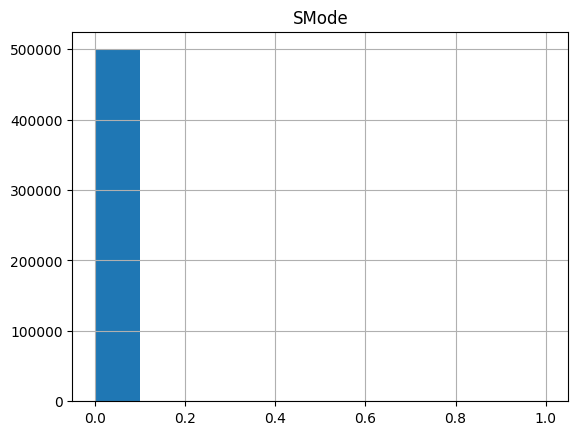

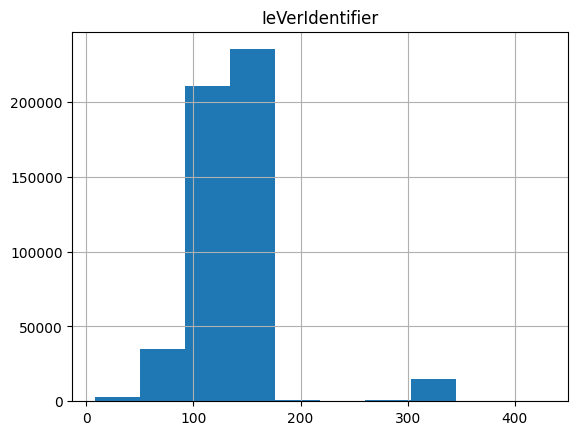

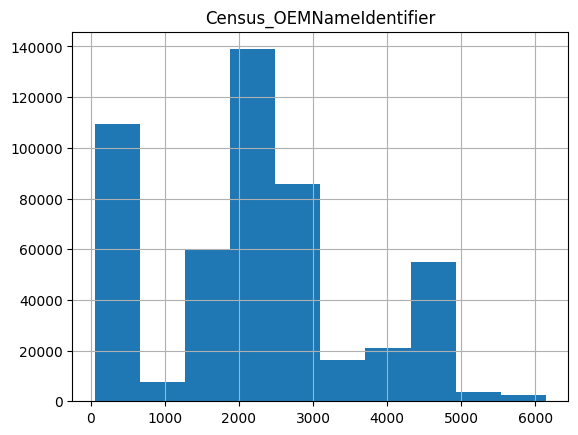

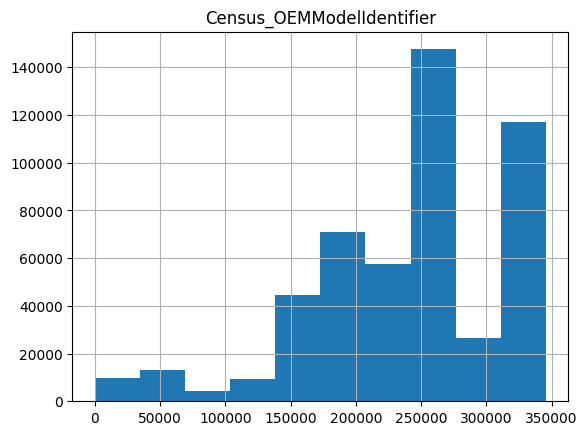

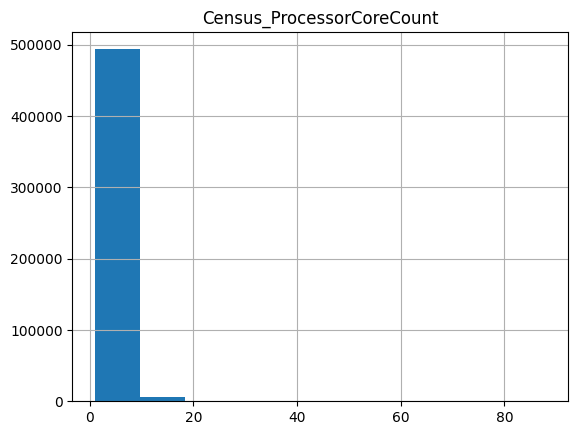

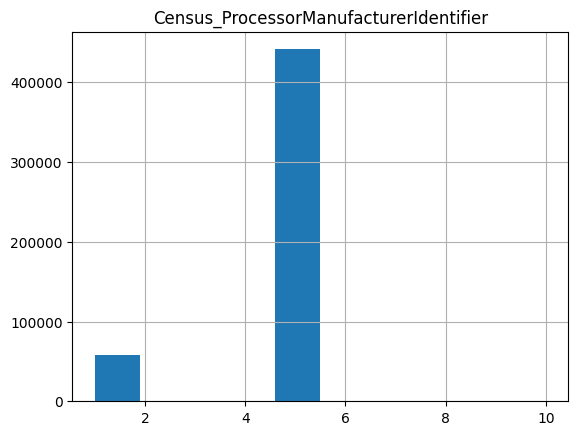

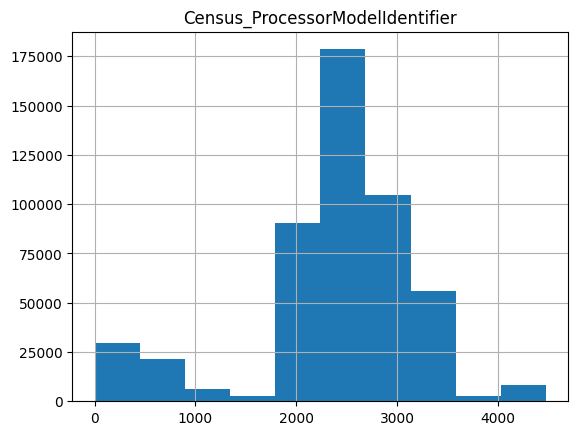

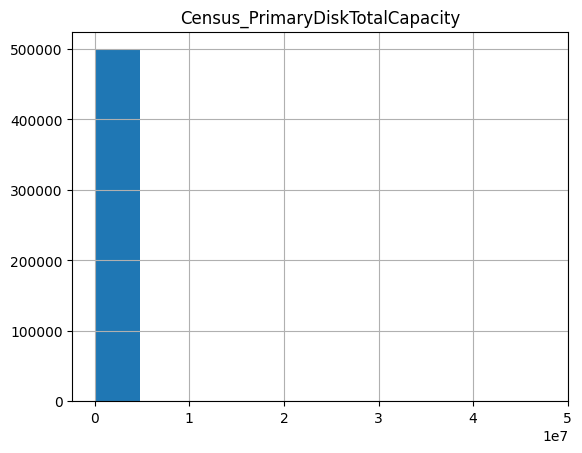

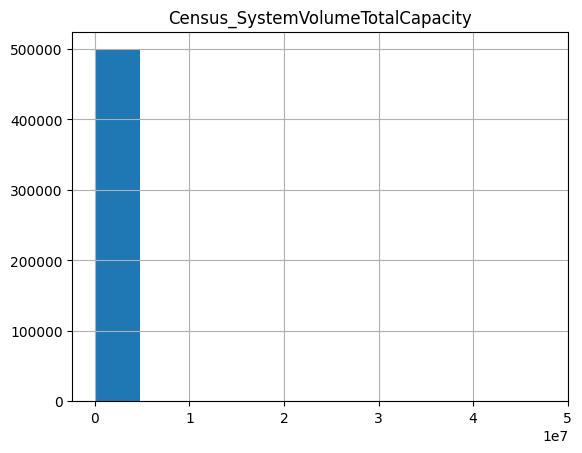

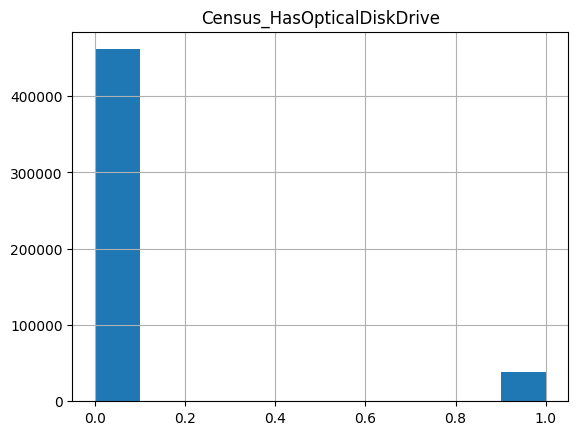

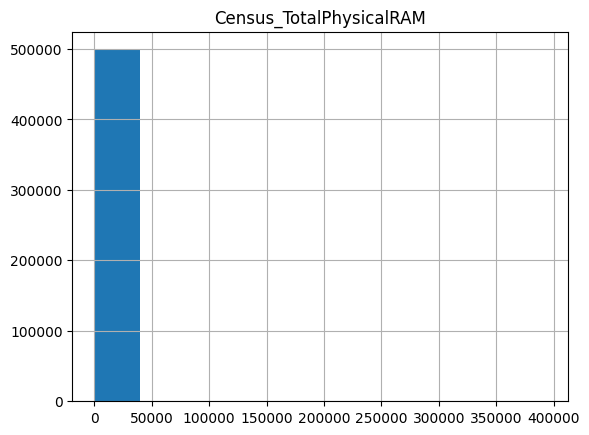

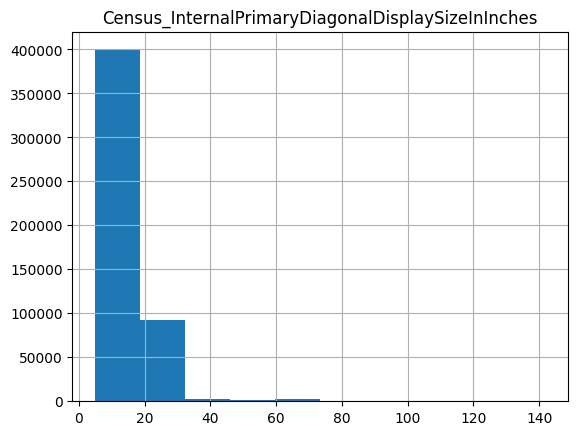

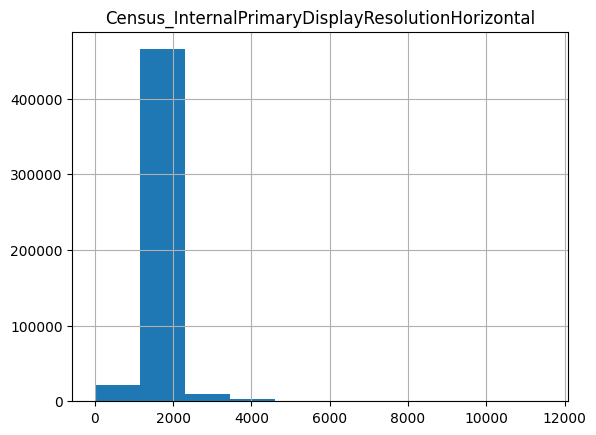

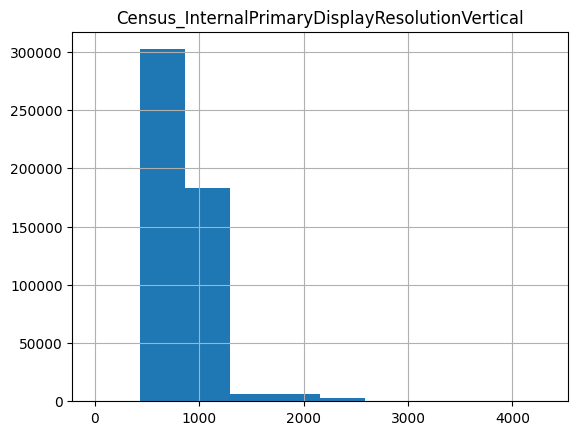

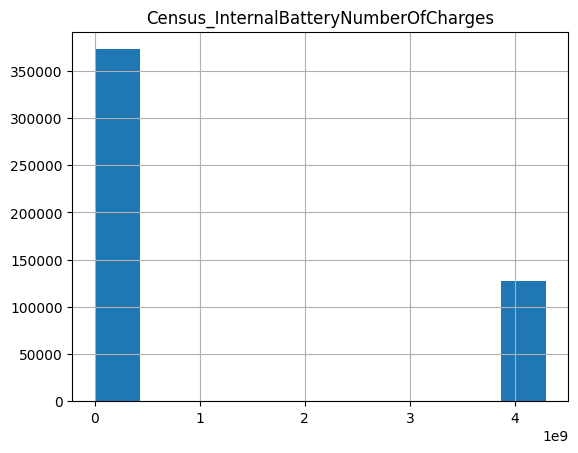

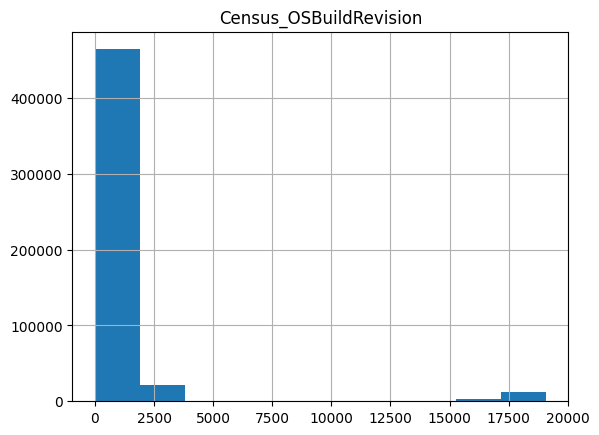

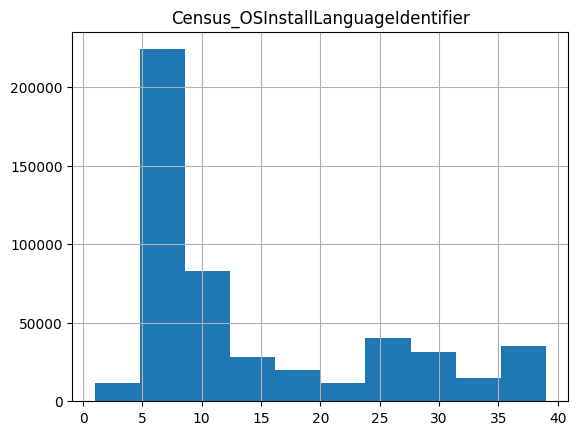

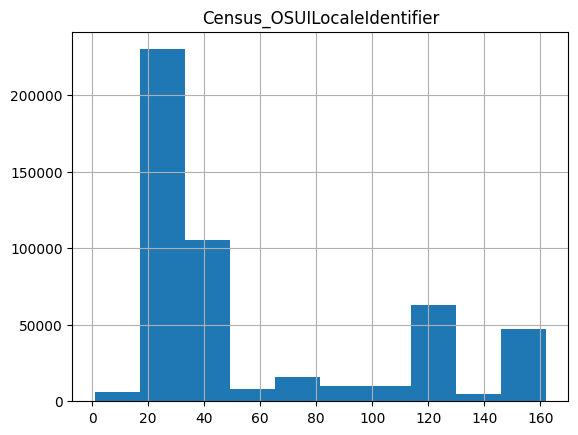

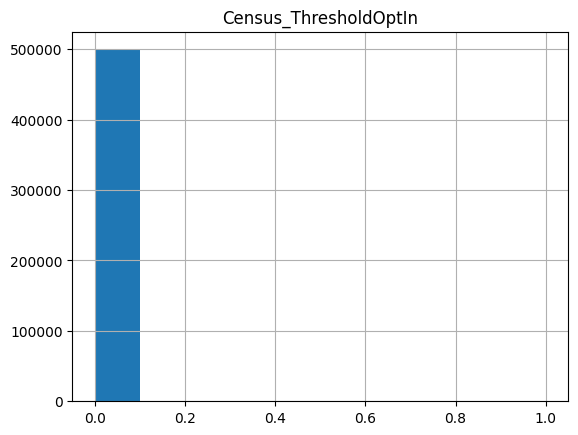

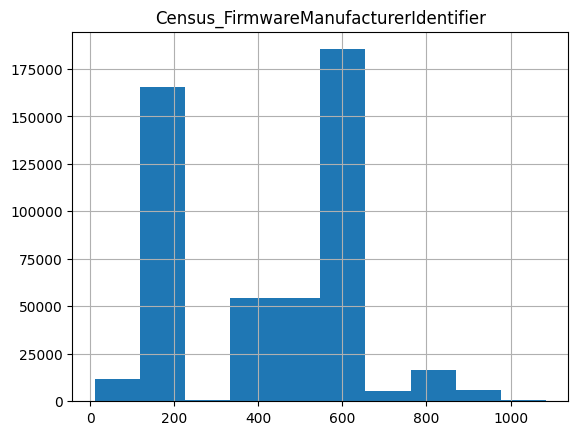

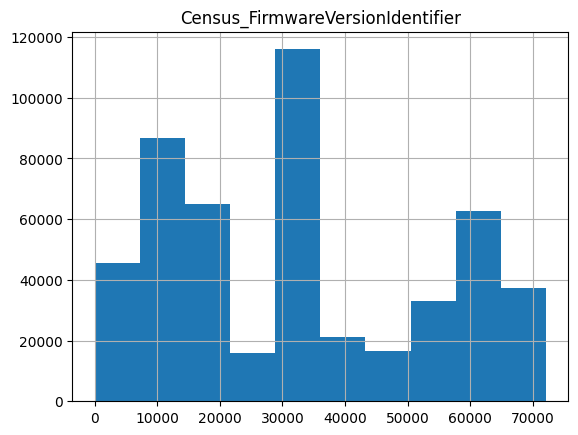

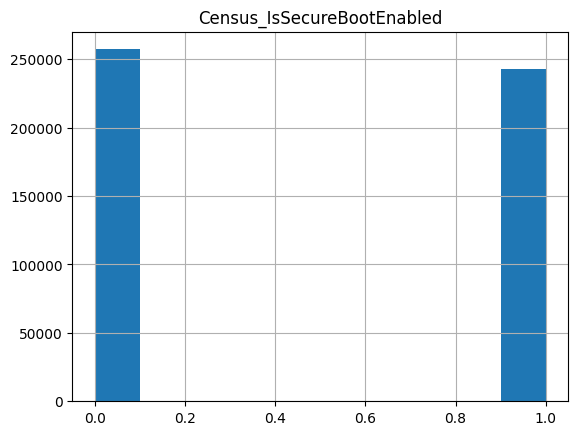

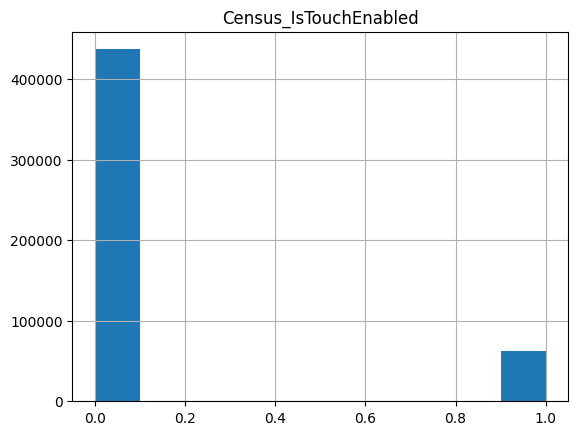

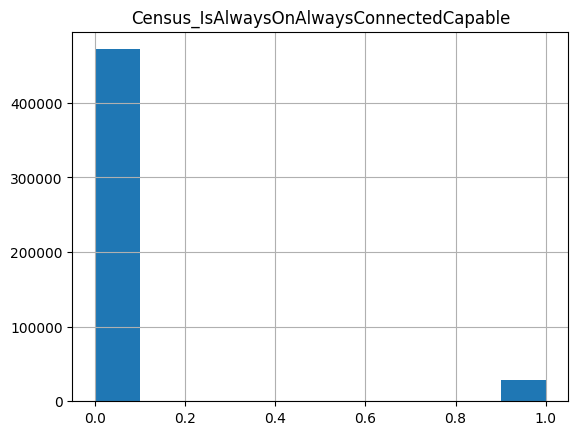

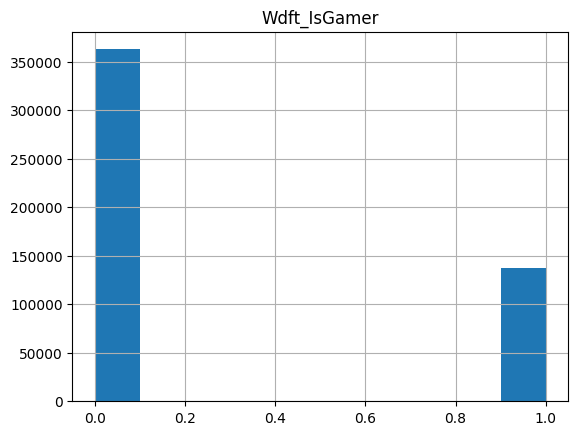

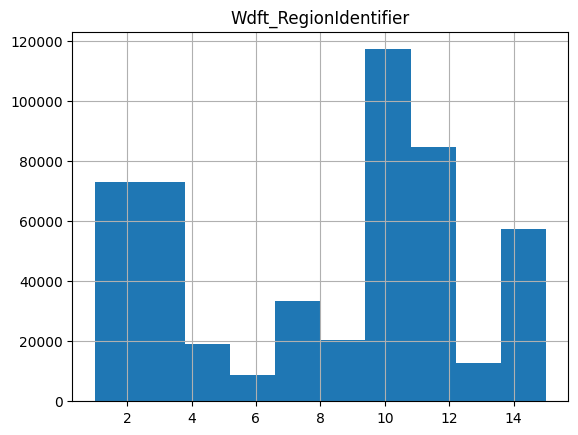

In [ ]:
for i in lista_numericas: # Loop en las variables numéricas
  print(df2.hist(i))

###VARIABLES CATEGORICAS

Ahora vamos a ver que tienen las variables categoricas

In [ ]:
for i in lista_categoricas:
  print(df2.value_counts(i))

Se han truncado las últimas 5000 líneas del flujo de salida.
1.261.1610.0       7
1.261.1612.0       7
1.263.808.0        7
1.263.1895.0       7
1.263.1067.0       7
1.263.1003.0       7
1.253.125.0        7
1.267.823.0        7
1.259.848.0        7
1.259.1753.0       7
1.263.272.0        7
1.261.807.0        7
1.231.2187.0       7
1.269.17.0         7
1.263.1888.0       7
1.233.3122.0       7
1.245.265.0        7
1.257.586.0        7
1.257.634.0        7
1.257.527.0        7
1.253.815.0        7
1.239.713.0        7
1.261.683.0        7
1.263.227.0        7
1.249.1333.0       7
1.263.1014.0       7
1.269.307.0        7
1.267.533.0        7
1.259.298.0        7
1.263.464.0        7
1.267.550.0        7
1.243.731.0        7
1.273.63.0         7
1.265.733.0        7
1.265.799.0        7
1.241.120.0        7
1.263.532.0        7
1.237.1259.0       7
1.235.754.0        7
1.263.854.0        7
1.251.1101.0       7
1.261.1575.0       7
1.257.995.0        7
1.225.3982.0       7
1.233.3230.0   

Buscamos las variables categoricas con menos de 10 categorias

###CORRELACION

In [ ]:
df3 = df2.copy() # Creamos una copia del dataset.

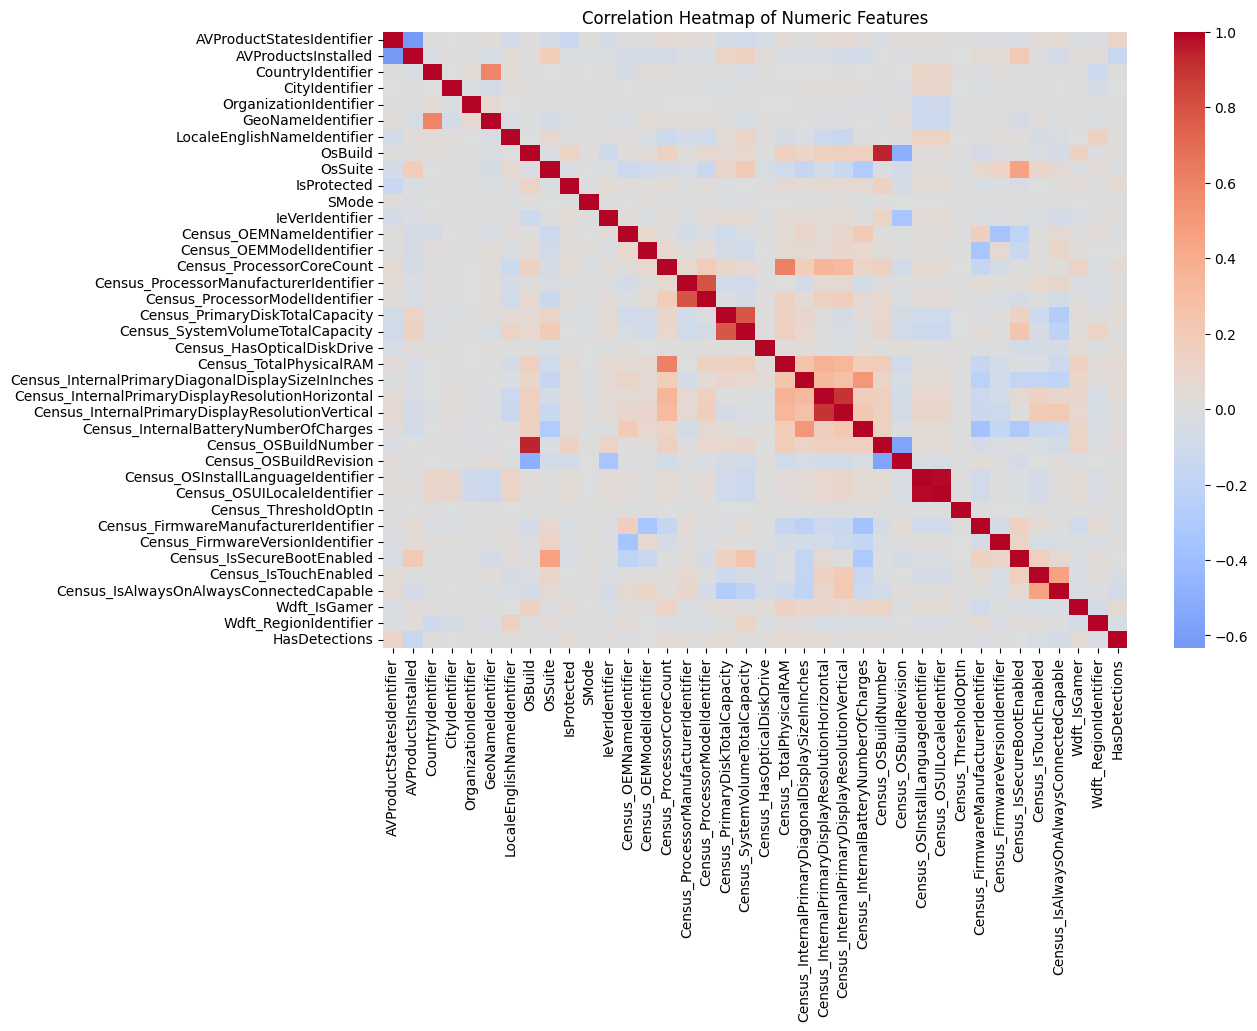

In [ ]:
# (5) Correlation heatmap (numeric features)
# -------------------------------
plt.figure(figsize=(12, 8))
corr = df3.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
#plt.savefig("reports/figs/corr_heatmap.png")
plt.show()

La variable "Census_OSBuildNumber" y "OSBuild" estan muy correlacionadas. Asi que vamos a borrar una de ellas.

In [ ]:
del(df3['Census_OSBuildNumber'])

  ### PROCESSAMIENTO DE VARIABLES

**1. Variables Categoricas**

Dado que el dataset Microsoft Malware Prediction contiene múltiples variables categóricas de alta cardinalidad y el modelo empleado (árboles de decisión, Random Forest, LightGBM) no depende de relaciones ordinales entre categorías, el uso de LabelEncoder es la estrategia más eficiente y adecuada.
Permite reducir la complejidad computacional, mantener la interpretabilidad del modelo y evitar la expansión excesiva de columnas que generaría el One-Hot Encoding

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = df3.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in categorical_cols:
    df3[col] = le.fit_transform(df3[col].astype(str))

In [ ]:
df3.dtypes

,0
EngineVersion,int64
AppVersion,int64
AvSigVersion,int64
AVProductStatesIdentifier,float64
AVProductsInstalled,float64
CountryIdentifier,int64
CityIdentifier,float64
OrganizationIdentifier,float64
GeoNameIdentifier,float64
LocaleEnglishNameIdentifier,int64


In [ ]:
print("Categorical features encoded.")

Categorical features encoded.


**2. Variables numericas**

Aca podriamos ver la posibilidad de escalar las variables feactures, o normalizarlas. Creo que a Priori no hace falta.

In [ ]:
#Podriamos normalizar nuestra variables numericas
# Aplicar logaritmo a cada columna


In [ ]:
df['Census_OSBuildNumber'].info()

<class 'pandas.core.series.Series'>
Index: 499963 entries, 0 to 499999
Series name: Census_OSBuildNumber
Non-Null Count   Dtype
--------------   -----
499963 non-null  int64
dtypes: int64(1)
memory usage: 7.6 MB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols_to_scale = [col for col in lista_numericas if col != 'HasDetections']
df3[numerical_cols_to_scale] = scaler.fit_transform(df3[numerical_cols_to_scale])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499963 entries, 0 to 499999
Data columns (total 59 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      499963 non-null  int64  
 1   AppVersion                                         499963 non-null  int64  
 2   AvSigVersion                                       499963 non-null  int64  
 3   AVProductStatesIdentifier                          499963 non-null  float64
 4   AVProductsInstalled                                499963 non-null  float64
 5   CountryIdentifier                                  499963 non-null  float64
 6   CityIdentifier                                     499963 non-null  float64
 7   OrganizationIdentifier                             499963 non-null  float64
 8   GeoNameIdentifier                                  499963 non-null  float64
 9 

**3. Correlaccion**

Hacemos otro analisis de correlacion

In [ ]:
corr = df3.corr(numeric_only = True) # Usamos la función de pandas "corr" que calcula la correlación entre las variables numéricas
corr.style.background_gradient(cmap='coolwarm') # Con esto obtenemos una tabla que muestra con colores la correlación entre variables

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Processor,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
EngineVersion,1.000000,0.308183,0.961901,0.061177,-0.115329,0.011360,0.003815,0.001173,0.016480,-0.010165,-0.017917,0.099379,-0.043651,0.086291,0.064395,0.034247,0.218889,0.005889,0.074863,0.005597,-0.037908,0.018039,0.012911,0.039868,0.007089,0.019577,-0.016524,0.025761,-0.020548,0.000718,0.046950,-0.039282,0.036287,0.047675,0.049437,-0.019042,0.046690,0.122289,-0.018217,0.057667,-0.010467,0.034191,0.034915,0.002031,0.016857,0.017686,-0.079900,-0.038433,0.024329,-0.005496,0.001982,-0.026911,-0.015986,-0.043470,0.005249,0.010171,0.063441,-0.026023,0.050475
AppVersion,0.308183,1.000000,0.313298,0.121209,-0.117477,0.013667,-0.006530,0.012301,0.034333,-0.021144,0.025048,-0.119046,-0.044992,0.224465,-0.501401,0.005501,0.081593,0.003206,-0.407065,0.000997,-0.012123,0.005387,0.023844,-0.011503,0.014106,-0.008800,-0.070797,0.050789,-0.077698,0.017718,-0.009017,-0.006549,-0.003735,0.002062,0.009180,0.022844,0.038798,-0.156191,0.024621,0.449825,0.230032,0.040958,0.042480,-0.120382,-0.034307,-0.029213,0.003098,-0.070853,0.023649,-0.177407,0.000942,-0.012948,-0.006967,-0.052389,0.021165,0.062992,0.099371,-0.023858,0.022896
AvSigVersion,0.961901,0.313298,1.000000,0.056680,-0.116077,0.011883,0.004423,0.002073,0.016246,-0.011794,-0.021654,0.110105,-0.046611,0.083098,0.073231,0.036897,0.248221,0.007289,0.079425,0.015612,-0.042533,0.018225,0.014519,0.047779,0.008738,0.023456,-0.016244,0.029286,-0.019919,-0.002586,0.054766,-0.044877,0.041022,0.056292,0.058352,-0.021531,0.051285,0.134651,-0.022016,0.054338,-0.018803,0.036592,0.037363,-0.007889,0.020785,0.021690,-0.094855,-0.035685,0.020800,0.000698,0.001719,-0.030979,-0.017145,-0.043875,0.005537,0.010427,0.067997,-0.026010,0.053609
AVProductStatesIdentifier,0.061177,0.121209,0.056680,1.000000,-0.632260,0.006688,-0.004800,0.003245,0.019431,-0.080211,-0.011685,0.001536,-0.059076,-0.023265,-0.059908,0.043593,-0.144968,0.008012,-0.071662,-0.014035,-0.024371,0.013057,0.016543,0.056660,0.031351,0.022444,-0.071715,0.062298,-0.086328,-0.051039,0.037030,-0.019766,0.003275,0.048332,0.061208,0.019578,0.022508,-0.028035,-0.011715,-0.004303,0.026166,0.051833,0.052299,-0.140371,0.018359,0.017458,0.097066,-0.021274,0.024359,-0.017448,0.002426,-0.008942,-0.016545,-0.033467,0.040631,0.062439,-0.029984,-0.014025,0.115556
AVProductsInstalled,-0.115329,-0.117477,-0.116077,-0.632260,1.000000,-0.023554,0.006209,-0.011495,-0.051146,0.042254,-0.050714,0.007231,0.181170,-0.049349,-0.008078,-0.157386,-0.024919,-0.012463,-0.030701,0.029119,0.062040,-0.062277,-0.054101,-0.053777,-0.023046,-0.040705,0.107359,-0.109305,0.139529,0.029527,-0.036650,0.066784,-0.039709,-

### MODELING

In [ ]:
df4 = df3.copy()
df4.head()

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,49,51,5557,0.398182,-0.623132,-1.586154,0.081267,0.308629,0.394836,0.712673,...,3,-0.009696,-0.226223,-0.622107,-0.971292,-0.378727,-0.245363,-0.615005,0.676980,1
1,49,51,5576,0.398182,-0.623132,0.332380,-0.563870,0.308629,-0.489580,0.020061,...,3,-0.009696,0.370152,0.747648,-0.971292,-0.378727,-0.245363,1.626003,-1.104664,0
2,49,83,5898,-0.077943,1.291145,0.649493,0.860523,0.308629,0.126152,-0.961139,...,3,-0.009696,0.679721,0.003752,1.029557,2.640427,-0.245363,-0.615005,1.567802,0
3,50,51,6078,0.398182,-0.623132,0.887328,0.692028,0.308629,0.394836,0.712673,...,3,-0.009696,-1.195903,0.734332,1.029557,-0.378727,-0.245363,-0.615005,1.567802,1
4,50,51,6254,-0.045301,1.291145,1.569121,-0.184890,0.308629,1.200886,-0.686980,...,3,-0.009696,-0.226223,-1.364386,1.029557,2.640427,-0.245363,1.626003,1.122391,1


In [ ]:
df4.isnull().sum()

,0
EngineVersion,0
AppVersion,0
AvSigVersion,0
AVProductStatesIdentifier,0
AVProductsInstalled,0
CountryIdentifier,0
CityIdentifier,0
OrganizationIdentifier,0
GeoNameIdentifier,0
LocaleEnglishNameIdentifier,0


Creaccion del data set de val y dev

In [ ]:
val_df = df4.sample(frac=0.2, random_state=42)
dev_df = df4.drop(val_df.index)

In [ ]:
dev_df.shape[0] + val_df.shape[0] == df4.shape[0]

True

In [ ]:

dev_df_X = dev_df.drop('HasDetections', axis = 1)
dev_df_y = dev_df[['HasDetections']]

val_df_X = val_df.drop('HasDetections',axis = 1)
val_df_y = val_df[['HasDetections']]

In [ ]:
val_df.shape

(99993, 59)

In [ ]:
# Dividir train/test
X = X = dev_df.drop(columns=["HasDetections"])
y = dev_df["HasDetections"]

#------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y
)

#------------------------------
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (319976, 58) Test shape: (79994, 58)


Como precaucion nomas, podemos guardar los archivos csv del entrenamiento y test

In [ ]:
# importar Os
import os

# Create folders if they don’t exist
os.makedirs("data/processed", exist_ok=True)

X_train.to_csv("data/processed/X_train.csv", index=False)
X_test.to_csv("data/processed/X_test.csv", index=False)
y_train.to_csv("data/processed/y_train.csv", index=False)
y_test.to_csv("data/processed/y_test.csv", index=False)

print("Preprocessed train/test data saved in data/processed/")

Preprocessed train/test data saved in data/processed/


Ahora Empezamos a Entrenar los modelos

1. decisionTree

In [ ]:
# Import libraries


In [ ]:
dt_base = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 1000)

In [ ]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=1000)

In [ ]:
data_tree = export_graphviz(
    decision_tree = dt_base,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['Not Infected','Infected'],
    proportion = True,
    filled=True,
    impurity=True,
    rotate=False,
    rounded=True
)

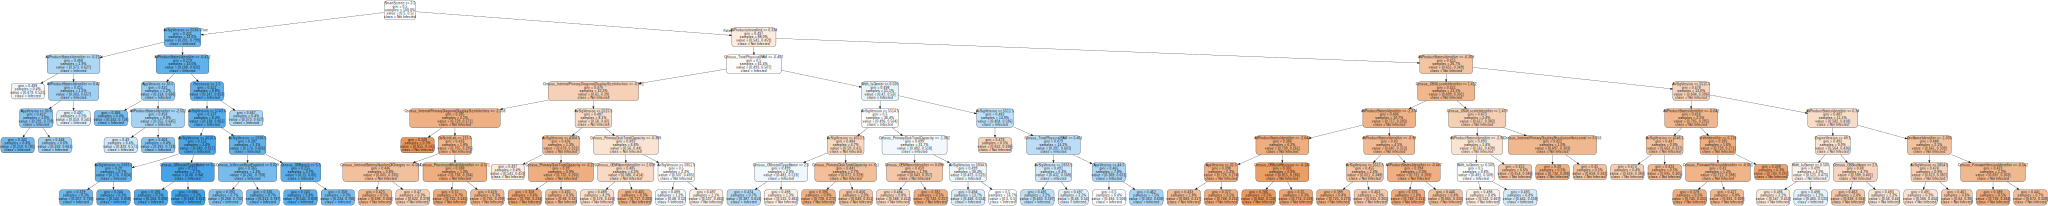

In [ ]:
graphviz.Source(data_tree)

In [ ]:
y_test_prediction = pd.DataFrame(dt_base.predict(X_test), index = y_test.index, columns = ['InfectionPrediction'])

In [ ]:
y_test.shape

(79994,)

In [ ]:
target = 'HasDetections'


y_test = y_test.squeeze()
y_test_prediction = y_test_prediction.squeeze()


results_df = pd.concat([y_test, y_test_prediction], axis=1)
results_df.columns = [target, 'InfectionPrediction']


print(results_df.columns)


results_df['Success'] = (results_df[target] == results_df['InfectionPrediction']).astype(int)

Index(['HasDetections', 'InfectionPrediction'], dtype='object')


In [ ]:
results_df.head()


,HasDetections,InfectionPrediction,Success
302420,1,1,1
120056,0,1,0
136864,0,0,1
5079,0,1,0
416555,0,0,1


In [ ]:
results_df['Success'] = (results_df[target] == results_df['InfectionPrediction']).astype(int)


In [ ]:
results_df['Success'].mean()

np.float64(0.6189589219191439)

In [ ]:
y_score = pd.DataFrame(dt_base.predict_proba(X_test)[:,1], index = y_test.index, columns = ['InfectionScore'])

In [ ]:
confusion_matrix = pd.crosstab(results_df[target], results_df['InfectionPrediction'])
TN = confusion_matrix.iloc[0,0]
TP = confusion_matrix.iloc[1,1]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
(TP+FP)/(TN+FP+FN+TP)

np.float64(0.6009575718178863)

In [ ]:
metrics.accuracy_score(results_df[target], results_df['InfectionPrediction'])


0.6189589219191439

In [ ]:
dt_base.score(X_train, y_train)

0.6194370827812086

In [ ]:
metrics.f1_score(results_df[target], results_df['InfectionPrediction'])

0.6538256237862148

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)

In [ ]:
Precision

np.float64(0.5987768601917917)

In [ ]:
Recall

np.float64(0.720021011556356)

In [ ]:
y_score = pd.DataFrame(dt_base.predict_proba(X_test)[:,1], index = y_test.index, columns = ['InfectionScore'])

In [ ]:
results_df = pd.concat([results_df, y_score], axis=1)

auc = metrics.roc_auc_score(results_df[target], results_df['InfectionScore'])
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.6754326009853201


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(results_df[target], results_df['InfectionScore'])

Text(0, 0.5, 'TPR')

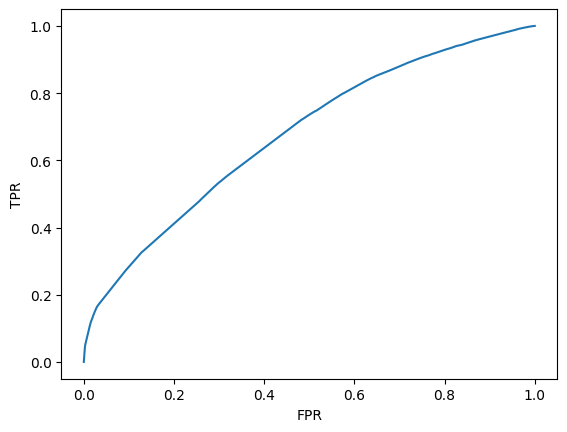

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
for i in range(1,20):
  dt_overfit = DecisionTreeClassifier(max_depth = i, random_state = 42, min_samples_leaf= 1000)
  dt_overfit.fit(X_train, y_train)
  #accuracy en train
  acc_train = np.round(dt_overfit.score(X_train, y_train),3)
  #accuracy en test
  acc_test = np.round(dt_overfit.score(X_test, y_test),3)
  print('Profundidad del arbol {}. Acc en train: {}, acc en test: {}, overfit: {}'.format(i,acc_train,acc_test,np.round(acc_train-acc_test,3)))

Profundidad del arbol 1. Acc en train: 0.572, acc en test: 0.572, overfit: 0.0
Profundidad del arbol 2. Acc en train: 0.58, acc en test: 0.579, overfit: 0.001
Profundidad del arbol 3. Acc en train: 0.603, acc en test: 0.602, overfit: 0.001
Profundidad del arbol 4. Acc en train: 0.603, acc en test: 0.602, overfit: 0.001
Profundidad del arbol 5. Acc en train: 0.612, acc en test: 0.612, overfit: 0.0
Profundidad del arbol 6. Acc en train: 0.617, acc en test: 0.616, overfit: 0.001
Profundidad del arbol 7. Acc en train: 0.619, acc en test: 0.619, overfit: 0.0
Profundidad del arbol 8. Acc en train: 0.624, acc en test: 0.621, overfit: 0.003
Profundidad del arbol 9. Acc en train: 0.624, acc en test: 0.622, overfit: 0.002
Profundidad del arbol 10. Acc en train: 0.628, acc en test: 0.627, overfit: 0.001
Profundidad del arbol 11. Acc en train: 0.631, acc en test: 0.628, overfit: 0.003
Profundidad del arbol 12. Acc en train: 0.632, acc en test: 0.629, overfit: 0.003
Profundidad del arbol 13. Acc en

In [ ]:

# 1. Initialize and train Decision Tree
# -------------------------------
dt_model = DecisionTreeClassifier(
    criterion='entropy',   # or 'gini'
    max_depth=10,          # limit depth to avoid overfitting
    min_samples_split=100, # avoid splits with very few samples
    random_state=42
)

dt_model.fit(X_train, y_train)
print("✅ Decision Tree trained successfully.")

✅ Decision Tree trained successfully.


Accuracy: 0.6240
ROC-AUC: 0.6816


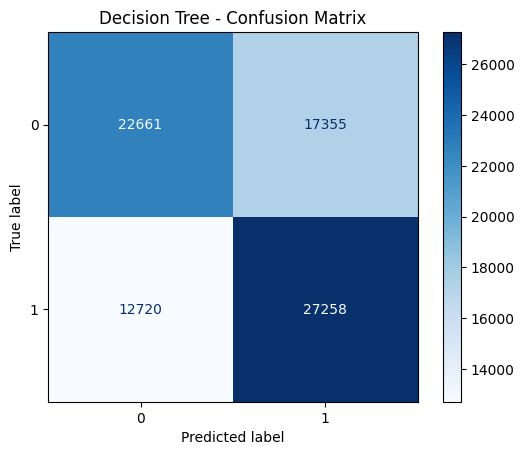

In [ ]:
# -------------------------------
# 2. Predictions
# -------------------------------
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:,1]  # probability for positive class

# -------------------------------
# 3. Evaluation
# -------------------------------
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

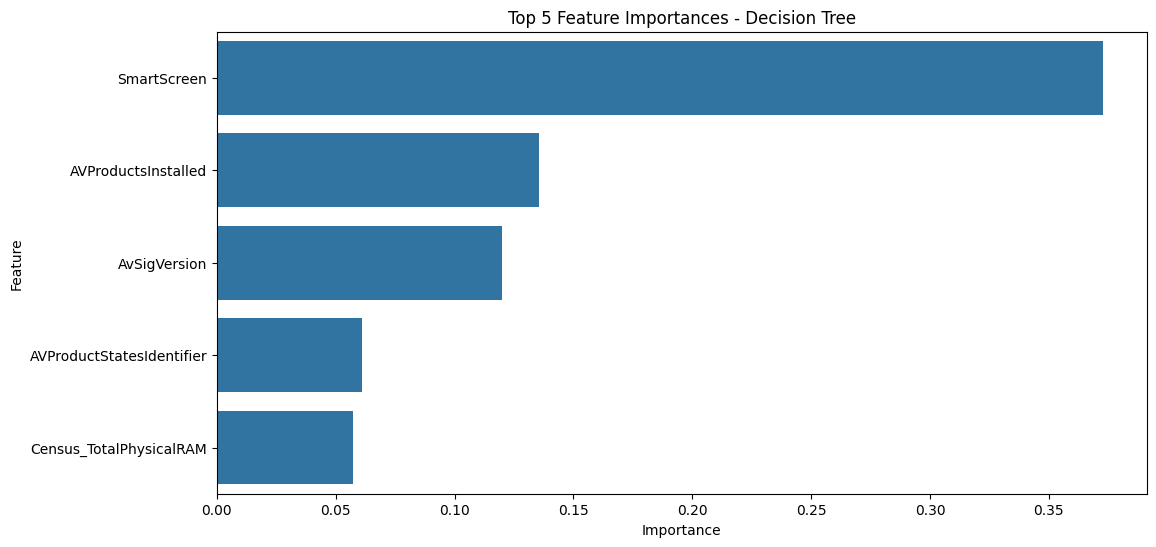

In [ ]:
# 4. Feature Importance
# -------------------------------
feat_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importance.head().values, y=feat_importance.head().index)
plt.title("Top 5 Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

2. RandomForest

In [ ]:
# Instalando Librerias
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Random Forest Classifier
# -------------------------------
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
print("✅ Random Forest trained successfully.")

✅ Random Forest trained successfully.


In [ ]:
# Predictions & evaluation
y_proba_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_rf = (y_proba_rf >= 0.5).astype(int)

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"\nRandom Forest Performance:")
print(f"Accuracy: {acc_rf:.4f}")
print(f"ROC-AUC: {roc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.6446
ROC-AUC: 0.7010

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65     40016
           1       0.65      0.64      0.64     39978

    accuracy                           0.64     79994
   macro avg       0.64      0.64      0.64     79994
weighted avg       0.64      0.64      0.64     79994



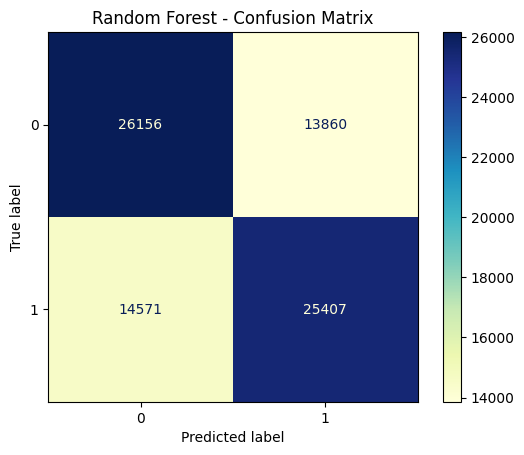

In [ ]:
#Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot(cmap='YlGnBu')
plt.title("Random Forest - Confusion Matrix")
plt.show()

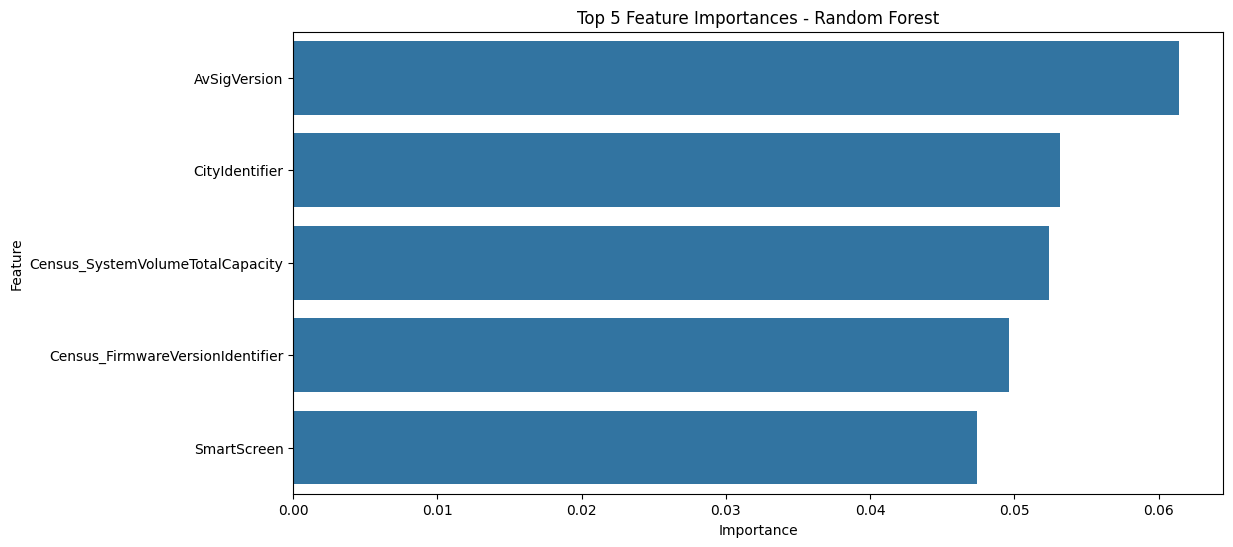

In [ ]:
# Top variables Importantes
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=rf_importance.head().values, y=rf_importance.head().index)
plt.title("Top 5 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

3. XGBoost

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='auc',
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
print("✅ XGBoost trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost trained successfully.


In [ ]:
# Predictions & evaluation
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]
y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_proba_xgb)

print(f"\nXGBoost Performance:")
print(f"Accuracy: {acc_xgb:.4f}")
print(f"ROC-AUC: {roc_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.6535
ROC-AUC: 0.7149

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66     40016
           1       0.66      0.65      0.65     39978

    accuracy                           0.65     79994
   macro avg       0.65      0.65      0.65     79994
weighted avg       0.65      0.65      0.65     79994



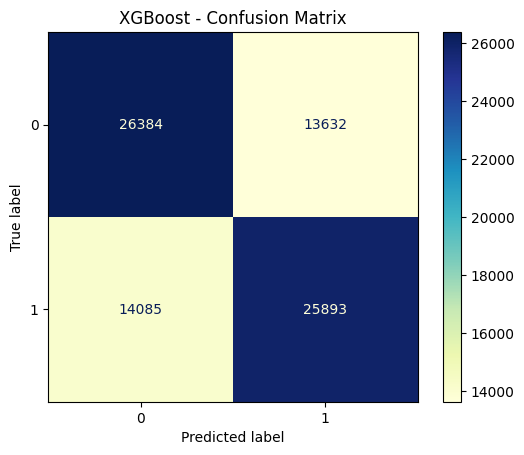

In [ ]:
#Confusion_Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(cmap='YlGnBu')
plt.title("XGBoost - Confusion Matrix")
plt.show()

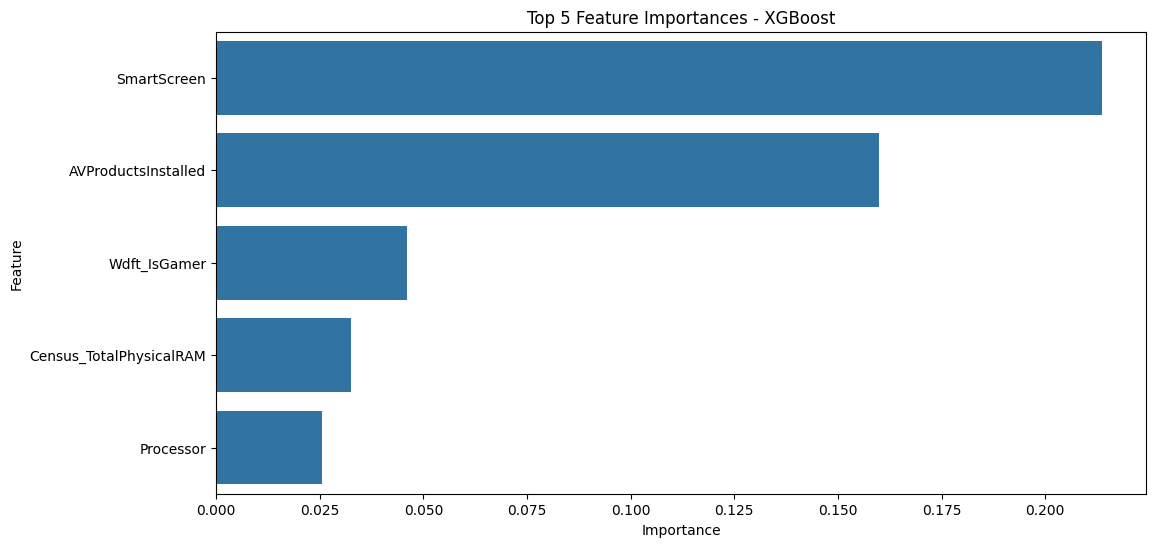

In [ ]:
# Variables importantes
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=xgb_importance.head().values, y=xgb_importance.head().index)
plt.title("Top 5 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()